In [22]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

names =["1","2","3","4","5","6","7","8","9","10","11","12","13","14"]
data_df = pd.read_csv('housing.csv',names=names)

data_df 


,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [23]:
X = data_df.iloc[:, :-1]
y = data_df.iloc[:, -1]

In [24]:
# Data Partition
import sklearn 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [25]:
print(X_train)
print(y_train)

            1     2      3  4      5      6     7       8   9   10    11  \
42    0.14150   0.0   6.91  0  0.448  6.169   6.6  5.7209   3  233  17.9   
58    0.15445  25.0   5.13  0  0.453  6.145  29.2  7.8148   8  284  19.7   
385  16.81200   0.0  18.10  0  0.700  5.277  98.1  1.4261  24  666  20.2   
78    0.05646   0.0  12.83  0  0.437  6.232  53.7  5.0141   5  398  18.7   
424   8.79210   0.0  18.10  0  0.584  5.565  70.6  2.0635  24  666  20.2   
..        ...   ...    ... ..    ...    ...   ...     ...  ..  ...   ...   
255   0.03548  80.0   3.64  0  0.392  5.876  19.1  9.2203   1  315  16.4   
72    0.09164   0.0  10.81  0  0.413  6.065   7.8  5.2873   4  305  19.2   
396   5.87200   0.0  18.10  0  0.693  6.405  96.0  1.6768  24  666  20.2   
235   0.33045   0.0   6.20  0  0.507  6.086  61.5  3.6519   8  307  17.4   
37    0.08014   0.0   5.96  0  0.499  5.850  41.5  3.9342   5  279  19.2   

         12     13  
42   383.37   5.81  
58   390.68   6.86  
385  396.90  30.81  
78 

In [26]:
#Feature Normalization: Normalize the features in the training data using z-score normalization
# Create parameters from training sets

parametersX = []

for i in range(len(X_train.columns)):
    Cseries = X_train.iloc[:, i]
    mean = np.mean(Cseries)
    std = np.std(Cseries)
    parametersX.append([mean,std])


In [27]:
# Normalize the training sets

X_train_norm = pd.DataFrame([[(X_train.iloc[i, j] - parametersX[j][0])/parametersX[j][1] 
                             for j in range(len(X_train.columns))] 
                            for i in range(len(X_train.iloc[:]))])

X_test_norm = pd.DataFrame([[(X_test.iloc[i, j] - parametersX[j][0])/parametersX[j][1] 
                             for j in range(len(X_test.columns))] 
                            for i in range(len(X_test.iloc[:]))])

# No need to normalize the test sets

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [28]:
#X_train_norm.head(10)
y_train.head(10)
#y_test.head(10)

,14
42,25.3
58,23.3
385,7.2
78,21.2
424,11.7
160,27.0
185,29.6
101,26.5
268,43.5
173,23.6


In [29]:
#Calculate the risk function and its gradient with respect to the parameters:

#Calculate the loss function

def costFunc(X,y,theta):
    m = X.shape[0]
    costs = X.dot(theta) - y
    total_cost = costs.transpose().dot(costs) / (2 * m)
    return total_cost[0][0]


In [30]:
#Calculate the parameters for Gradient Descent
def return_Y_estimate(theta_now, data_x):
     # Make sure that Theta now is a column vector
    theta_now = theta_now.reshape(-1, 1)
    _Y_estimate = np.dot(data_x, theta_now)

    return _Y_estimate

#Calculate gradient of theta with the input data_x being added a all 1 left most column. 
def return_dJ(theta_now, data_x, y_true):
    y_estimate = return_Y_estimate(theta_now, data_x)
    _N = data_x.shape[0]
    _num_of_features = data_x.shape[1]
    _dJ = np.zeros([_num_of_features, 1])
    
    for i in range(_num_of_features):
        _dJ[i, 0] = 2 * np.dot((y_estimate - y_true).T, data_x[:, i]) / _N
    
    return _dJ

# Calculate RMSE
def RMSE(theta_now, data_x, y_true):
    N = data_x.shape[0]
    temp = y_true - np.dot(data_x, theta_now)
    RMSE = np.sqrt(np.dot(temp.T, temp) / N)
    
    return RMSE

#Gradient Descent and return the theta, value of loss function for each iteration and iteration number
def gradient_descent(X, y, Learning_rate, ER, iterNum):
    
    _num_of_samples = X.shape[0]
    # Join all 1 columns on the most left side of x
    X_0 = np.ones([_num_of_samples, 1])
    new_x = np.column_stack((X_0, X))
   # Make sure that y is a column vector
    new_y = y.values.reshape(-1, 1)
    _num_of_features = new_x.shape[1]
    # Initialize the theta vector to all 0
    theta = np.zeros([_num_of_features, 1])
    flag = 0  # Define an exit flag
    ct = 0  # Calculate the number of iterations
    J_history = list()
    
    while flag == 0 and ct < iterNum:
        last_theta = theta
        
                # Update theta
        gradient =  return_dJ(theta, new_x, new_y)
        theta = theta - Learning_rate * gradient
        er = RMSE(last_theta, new_x, new_y) - RMSE(theta, new_x, new_y)
        J_history.append(costFunc(new_x, new_y, theta))
        
        # When the error reaches the threshold, break calculation
        if er < ER :
            flag = 1
        
        # update iteration number
        ct += 1
        
            
    return theta,J_history, ct

In [31]:
# Update the estimates of regression coeﬃcients over iterations while using the given set of parameters 
Learning_rate = 0.4*1e-3
ER = 0.5*1e-2
iterNum = 50000

In [32]:
theta, J_history, ct = gradient_descent(X_train_norm, y_train, Learning_rate, ER, iterNum)
print(theta)
print(J_history)
ct

[[ 1.52180413e+01]
 [-6.28013510e-01]
 [ 5.04498049e-01]
 [-5.56256460e-01]
 [ 6.98633745e-01]
 [-4.93115194e-01]
 [ 2.41477554e+00]
 [-3.13560157e-01]
 [-6.83967116e-01]
 [ 5.02509401e-03]
 [-3.89681206e-01]
 [-1.52928397e+00]
 [ 5.87401367e-01]
 [-2.31799653e+00]]
[293.43208287564323, 292.8492212074371, 292.2685769507786, 291.69013399370834, 291.11387637327067, 290.5397882740654, 289.9678540268143, 289.3980581069412, 288.8303851331666, 288.2648198661156, 287.70134720693954, 287.1399521959511, 286.580620011273, 286.0233359675, 285.46808551437334, 284.9148542354691, 284.3636278468986, 283.8143921960224, 283.2671332601759, 282.7218371454082, 282.17849008523297, 281.6370784393915, 281.0975886926284, 280.5600074534785, 280.0243214530662, 279.49051754391655, 278.9585826987776, 278.42850400945457, 277.9002686856556, 277.37386405384854, 276.8492775561289, 276.32649674909925, 275.805509302759, 275.28630299940573, 274.76886573254683, 274.25318550582193, 273.739250431936, 273.2270487316026, 272

1407

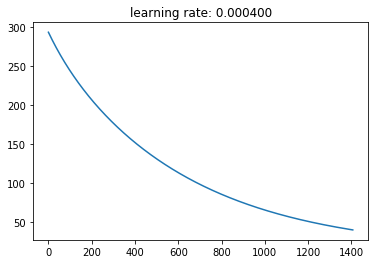

In [33]:
# Plot the convergence during the gradient descent
# learning rate = 0.4e−3, 
plt.figure()
plt.plot([i for i in range(len(J_history))], J_history)
plt.title("learning rate: %f" % Learning_rate)
plt.show()


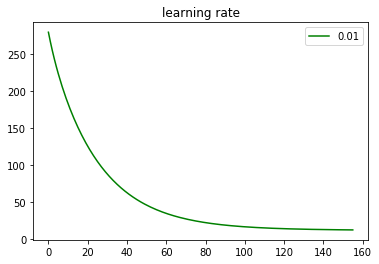

In [34]:
# Plot the convergence during the gradient descent
# learning rate = 0.01
ta1, J_history1, ct1 = gradient_descent(X_train_norm, y_train, 0.01, 0.5*1e-2, 50000)
colors = ['b', 'g', 'r']
plt.figure()
plt.plot([i for i in range(len(J_history1))], J_history1, colors[1], label="0.01")
plt.title("learning rate")
plt.legend()
plt.show()


In [35]:
ta2, J_history2, ct2 = gradient_descent(X_train_norm, y_train, 0.05, 0.5*1e-2, 50000)
ct2

42

In [36]:
ta3, J_history3, ct3 = gradient_descent(X_train_norm, y_train, 0.1, 0.5*1e-2, 50000)
J_history3

[182.6321726350787,
 120.51950398255151,
 81.36997186658432,
 56.393030881506355,
 40.42317398786143,
 30.19686084494063,
 23.63710870496069,
 19.42014970758231,
 16.701531022901655,
 14.94214637066802,
 13.797577116017337,
 13.047630404180273,
 12.551432867864929,
 12.218789022671395,
 11.991900875819264,
 11.833693376223554,
 11.720354450131463,
 11.63656567225295,
 11.57245163171635,
 11.521627704724958,
 11.479950139277415,
 11.444715388615855,
 11.414146936624395,
 11.387066176803138,
 11.3626811728326,
 11.340450952871928]

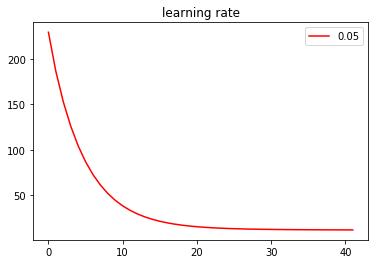

In [37]:
# Plot the convergence during the gradient descent
# learning rate = 0.05
colors = ['b', 'g', 'r']
plt.figure()
plt.plot([i for i in range(len(J_history2))], J_history2, colors[2], label="0.05")
plt.title("learning rate")
plt.legend()
plt.show()

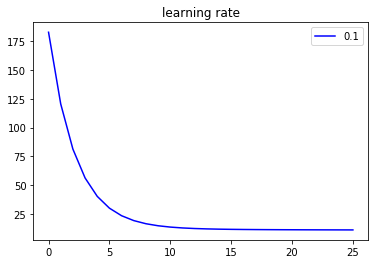

In [38]:
# Plot the convergence during the gradient descent
# learning rate = 0.1
colors = ['b', 'g', 'r']
plt.figure()
plt.plot([i for i in range(len(J_history3))], J_history3, colors[0], label="0.1") 
plt.title("learning rate")
plt.legend()
plt.show()

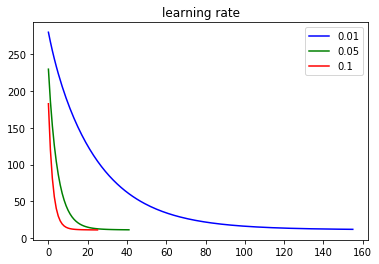

In [39]:
#Comparing the results of different learning rates
def learningRatePlot(X_norm, y):
    colors = ['b', 'g', 'r', 'c','m']
    plt.figure()
    
    for i, al in enumerate([0.01, 0.05, 0.1]):
        
        ta, J, ci = gradient_descent(X_norm, y, al, 0.5*1e-2, 50000)
 
        plt.plot([i for i in range(len(J))], J, colors[i], label=str(al))
 
    plt.title("learning rate")
    plt.legend()
    plt.show()
    
learningRatePlot(X_train_norm, y_train)

In [517]:
#Theta by Learning_rate = 0.4*1e-3
print(theta)

[[ 1.52180413e+01]
 [-6.28013510e-01]
 [ 5.04498049e-01]
 [-5.56256460e-01]
 [ 6.98633745e-01]
 [-4.93115194e-01]
 [ 2.41477554e+00]
 [-3.13560157e-01]
 [-6.83967116e-01]
 [ 5.02509401e-03]
 [-3.89681206e-01]
 [-1.52928397e+00]
 [ 5.87401367e-01]
 [-2.31799653e+00]]


In [43]:
#Prediction by theta returned by Gradient Descent
X_1=np.ones([len(X_test_norm), 1])
X_pre_norm = np.column_stack((X_1, X_test_norm))
y_pre = X_pre_norm.dot(theta)
print(y_pre)
print(y_test)

[[21.40012708]
 [20.82549246]
 [13.21318063]
 [16.13918666]
 [ 9.48456409]
 [13.00141016]
 [21.86636142]
 [12.52401818]
 [16.61584545]
 [18.94040895]
 [15.92370161]
 [22.29301682]
 [13.94324004]
 [18.7186389 ]
 [15.18950946]
 [ 9.53329594]
 [ 9.58496176]
 [28.07092573]
 [22.00134459]
 [ 6.03930727]
 [13.92694905]
 [11.16450335]
 [17.65725619]
 [17.92083233]
 [22.42123272]
 [ 4.01215355]
 [ 9.58577629]
 [14.76143013]
 [26.42589503]
 [ 6.33761057]
 [19.40263026]
 [10.81362035]
 [30.95622075]
 [10.30512914]
 [17.61906082]
 [14.00149737]
 [10.02654696]
 [21.528234  ]
 [ 0.44838236]
 [11.02439827]
 [19.26368441]
 [16.58636546]
 [19.70377811]
 [ 7.86870809]
 [10.024356  ]
 [ 8.41872785]
 [28.52678499]
 [ 9.22855188]
 [16.37902479]
 [13.14638753]
 [15.41642758]
 [18.26635363]
 [18.98701036]
 [17.1626476 ]
 [ 2.03279095]
 [17.60354332]
 [ 4.86147525]
 [17.8261637 ]
 [11.99011328]
 [26.48791341]
 [10.95997401]
 [19.73717629]
 [ 7.95774614]
 [ 9.21918523]
 [ 7.74556691]
 [22.58686251]
 [27.21547

In [44]:
#Function of RMSE
def RMSE_Regression (y_pre, y_test):
    N = y_pre.shape[0]
    temp = y_test - y_pre
    RMSE_GD = np.sqrt(np.dot(temp.T, temp) / N)
    print(RMSE_GD)

In [45]:
#Return the RMSE through Gradient Descent 
RMSE_GD = RMSE_Regression(y_pre, y_test)

[[9.05764078]]


In [46]:
#Least Squares Estimation using Normal Equations
# Function od calculate the theta through normal equation
def normalEquation(X, y):
    return np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

In [47]:
#Calculate thetause through the normal equation
theta_LSE = normalEquation(X_pre_norm, y_test)

In [48]:
#Prediction by normal equation
x_pre = X_pre_norm
y_pre2 = x_pre.dot(theta_LSE)
print(y_pre2)


[[32.29815718]
 [26.59361062]
 [17.26886533]
 [20.46374921]
 [16.23125703]
 [19.96889568]
 [30.2550416 ]
 [17.1627033 ]
 [31.12744453]
 [27.38335714]
 [26.59605671]
 [28.46841238]
 [20.0780257 ]
 [21.97937085]
 [22.38463722]
 [17.32867966]
 [19.08366945]
 [43.61319158]
 [26.03152486]
 [ 8.93121706]
 [19.3782669 ]
 [14.34241887]
 [25.60132926]
 [25.98364181]
 [27.79957903]
 [ 6.64082358]
 [12.56687676]
 [16.17342093]
 [38.88300305]
 [12.84336705]
 [18.7984805 ]
 [11.17651211]
 [43.2491582 ]
 [18.55460354]
 [21.70712465]
 [21.678517  ]
 [17.74969728]
 [29.70074378]
 [ 3.89704965]
 [18.78565961]
 [25.18957952]
 [22.60504076]
 [29.578376  ]
 [14.8687728 ]
 [18.4581687 ]
 [14.42888024]
 [48.98119384]
 [17.38154904]
 [22.75716936]
 [16.88358068]
 [26.76002438]
 [22.80888902]
 [25.2895029 ]
 [24.75637014]
 [ 1.42214377]
 [22.74728657]
 [11.60950456]
 [26.96449476]
 [16.71984385]
 [40.30604466]
 [19.32509915]
 [28.27237303]
 [15.53727005]
 [15.17964994]
 [12.61405867]
 [34.36706436]
 [41.19918

In [49]:
#Return the RMSE through Least Squares Estimation  
RMSE_LSE = RMSE_Regression(y_pre2, y_test)

[[4.09263776]]
